In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta='../datasets/apcdata_NorthAve.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(169127, 13)

## 1. Descripción del Conjunto de Datos
* Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

* Fuente: Este conjunto de datos sobre vehículos y paradas en una red de transporte público. Podría haber sido recopilado por una autoridad de transporte, una empresa de transporte o como parte de un proyecto de análisis de movilidad. Dado que no se especifica directamente la fuente, es importante validar este punto si es necesario.
* calendar_day: Día del calendario en que se registró el evento de transporte.
* route: Identificador único de la ruta de transporte.
* route_name: Nombre textual de la ruta de transporte.
* direction: Dirección de la ruta (por ejemplo, "Norte", "Sur", etc.).
* stop_id: Identificador único de cada parada de transporte.
* stop_name: Nombre o ubicación de la parada de transporte.
* arrival_time: Hora de llegada del vehículo a la parada.
* departure_time: Hora de salida del vehículo de la parada.
* ons: Número de pasajeros que suben al vehículo en la parada.
* offs: Número de pasajeros que bajan del vehículo en la parada.
* latitude: Coordenada de latitud geográfica de la parada o vehículo.
* longitude: Coordenada de longitud geográfica de la parada o vehículo.
* vehicle_number: Número único del vehículo que realiza el trayecto.

*Tamaño del Conjunto de Datos: Número de Filas: 169,127 - Número de Columnas: 13

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169127 entries, 0 to 169126
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calendar_day    169127 non-null  object 
 1   route           169127 non-null  int64  
 2   route_name      169127 non-null  object 
 3   direction       169127 non-null  object 
 4   stop_id         169127 non-null  int64  
 5   stop_name       169127 non-null  object 
 6   arrival_time    48524 non-null   object 
 7   departure_time  48492 non-null   object 
 8   ons             167441 non-null  float64
 9   offs            167470 non-null  float64
 10  latitude        169127 non-null  float64
 11  longitude       169127 non-null  float64
 12  vehicle_number  169127 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 16.8+ MB


## 2. Análisis Estadístico Descriptivo
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.

In [4]:
df.describe()

,route,stop_id,ons,offs,latitude,longitude,vehicle_number
count,169127.000000,169127.000000,167441.000000,167470.000000,169127.000000,169127.000000,169127.000000
mean,46.579227,542173.916371,0.399812,0.383239,33.746185,-84.366436,1985.745676
std,49.456601,382440.080307,1.797463,1.638881,0.040117,0.027464,432.188569
min,1.000000,104012.000000,0.000000,0.000000,33.528700,-84.456522,1401.000000
25%,4.000000,127012.000000,0.000000,0.000000,33.737589,-84.381984,1551.000000
50%,26.000000,900051.000000,0.000000,0.000000,33.755787,-84.349396,2230.000000
75%,102.000000,904513.000000,0.000000,0.000000,33.771048,-84.349197,2349.000000
max,194.000000,907473.000000,50.000000,43.000000,33.773728,-84.330239,2831.000000


In [5]:
# Para obtener la distribución de las variables categóricas
route_name_dist = df['route_name'].value_counts()
direction_dist = df['direction'].value_counts()
stop_name_dist = df['stop_name'].value_counts()
calendar_day_dist = df['calendar_day'].value_counts()

# Imprimir resultados
print("Distribución de 'route_name':\n", route_name_dist)
print("\nDistribución de 'direction':\n", direction_dist)
print("\nDistribución de 'stop_name':\n", stop_name_dist)
print("\nDistribución de 'calendar_day':\n", calendar_day_dist)

Distribución de 'route_name':
 route_name
4: McDonough Blvd/Moreland Ave                        41432
107: Glenwood Road                                    20019
102: Moreland/Candler Park                            19238
9: Toney Valley                                       12795
26: Perry Blvd/West Highlands                         12432
6: Emory                                              11795
53: Grove Park                                        10052
1: Centennial Olympic Park/Coronet Way                 9362
99: North Avenue/Boulevard                             8446
32: Eastland/Bouldercrest                              8440
95: Metropolitan Pkwy/Hapeville                        2626
2: Ponce de Leon Ave                                   2106
21: Memorial Drive                                     1881
193: Justice Center SR 54-Jonesboro Rd./East Point     1552
194:Justice Center/Mt. Zion/SR 42-Moreland Ave         1488
16: Noble                                              137

## 3. Visualizaciones:
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).

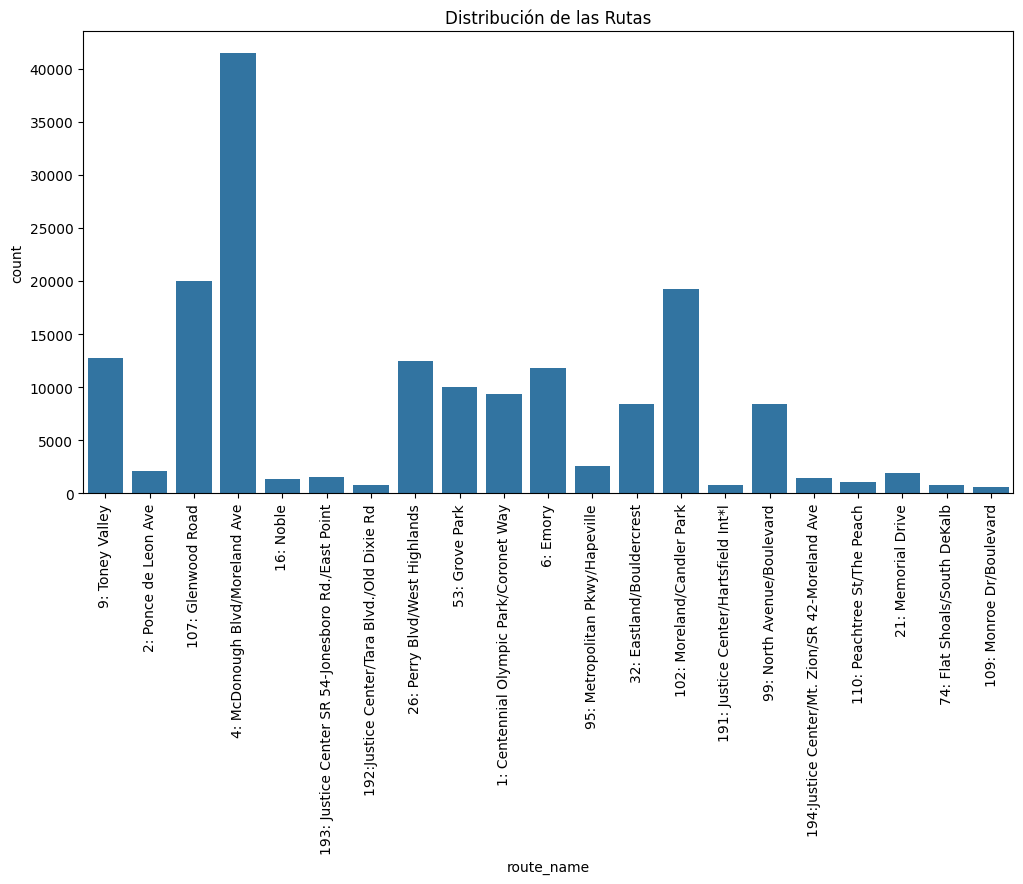

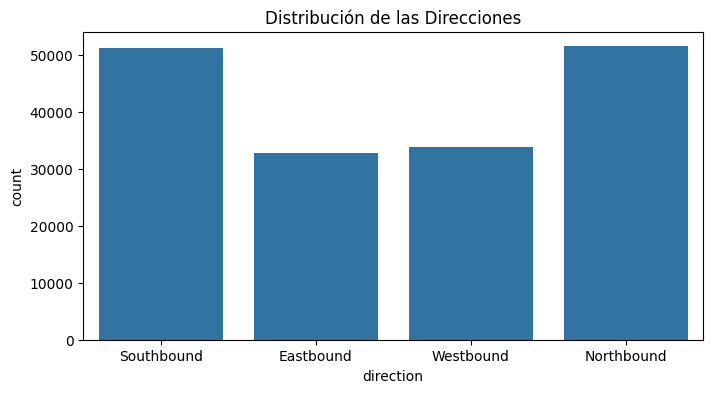

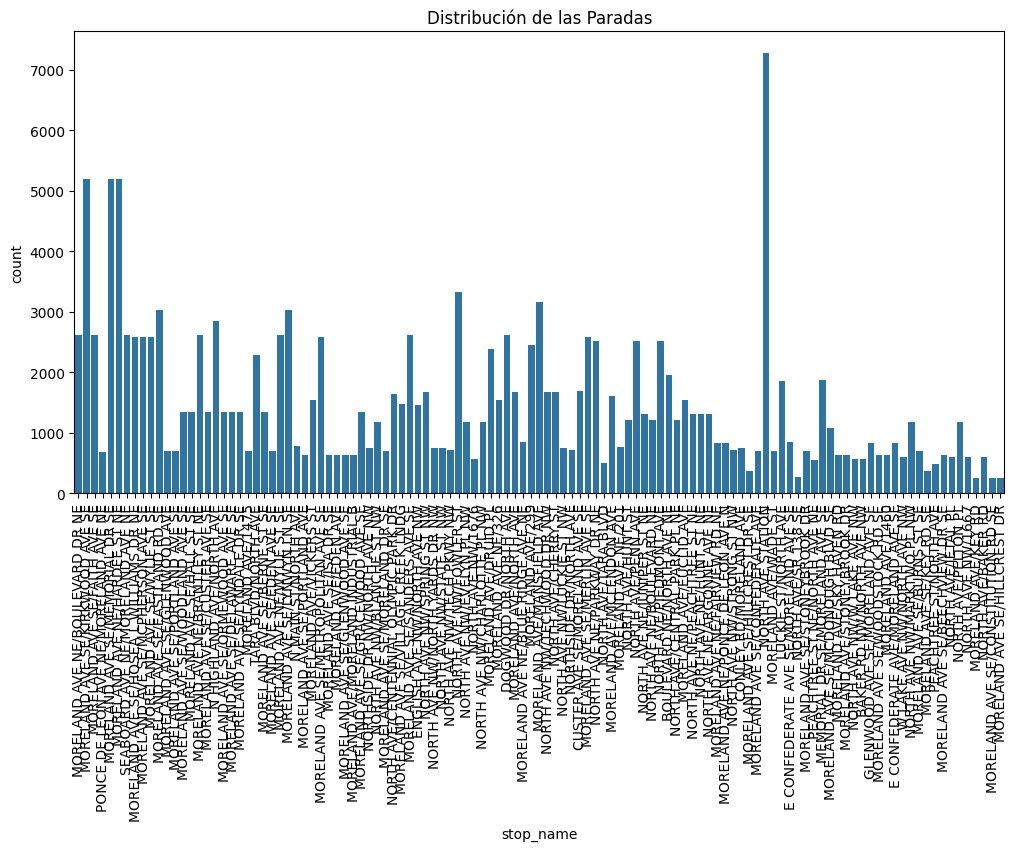

In [6]:
# Gráfico de barras para las variables categóricas
plt.figure(figsize=(12, 6))
sns.countplot(x='route_name', data=df)
plt.title('Distribución de las Rutas')
plt.xticks(rotation=90)  # Rotar etiquetas si son largas
plt.show()

# Para la variable 'direction'
plt.figure(figsize=(8, 4))
sns.countplot(x='direction', data=df)
plt.title('Distribución de las Direcciones')
plt.show()

# Para la variable 'stop_name' (puedes hacer lo mismo con otras)
plt.figure(figsize=(12, 6))
sns.countplot(x='stop_name', data=df)
plt.title('Distribución de las Paradas')
plt.xticks(rotation=90)
plt.show()

## 4. Identificación de Valores Nulos y Outliers
* Detectar valores nulos y discutir cómo podrían ser tratados.
* Identificar outliers y evaluar su impacto potencial en el análisis

In [7]:
df.isnull().sum()

calendar_day           0
route                  0
route_name             0
direction              0
stop_id                0
stop_name              0
arrival_time      120603
departure_time    120635
ons                 1686
offs                1657
latitude               0
longitude              0
vehicle_number         0
dtype: int64

In [8]:
# eliminamos las filas que contengan valores nulos en todas las columnas
df_cleaned = df.dropna(how='all')
df_cleaned.shape

(169127, 13)

In [9]:
df_cleaned.isnull().sum()

calendar_day           0
route                  0
route_name             0
direction              0
stop_id                0
stop_name              0
arrival_time      120603
departure_time    120635
ons                 1686
offs                1657
latitude               0
longitude              0
vehicle_number         0
dtype: int64

In [10]:
Q1 = df['ons'].quantile(0.25)
Q3 = df['ons'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers
outliers = df[(df['ons'] < lower_bound) | (df['ons'] > upper_bound)]
print(outliers)


       calendar_day  route                      route_name   direction  \
8        01/01/2017    107              107: Glenwood Road   Eastbound   
14       01/01/2017    107              107: Glenwood Road   Westbound   
17       01/01/2017    107              107: Glenwood Road   Eastbound   
22       01/01/2017      9                 9: Toney Valley  Southbound   
108      01/01/2017      4  4: McDonough Blvd/Moreland Ave  Southbound   
...             ...    ...                             ...         ...   
169108   01/31/2017    102      102: Moreland/Candler Park   Westbound   
169110   01/31/2017      9                 9: Toney Valley  Southbound   
169115   01/31/2017    107              107: Glenwood Road   Westbound   
169116   01/31/2017    107              107: Glenwood Road   Westbound   
169119   01/31/2017     21              21: Memorial Drive   Eastbound   

        stop_id                            stop_name arrival_time  \
8        900860         MORELAND AVE NE/HA

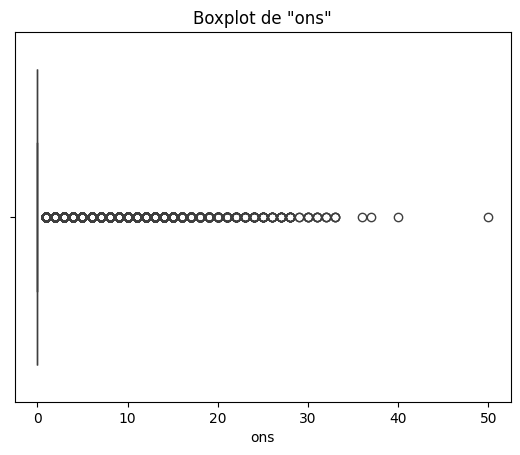

In [11]:
# Boxplot de la variable 'ons'
sns.boxplot(x=df['ons'])
plt.title('Boxplot de "ons"')
plt.show()

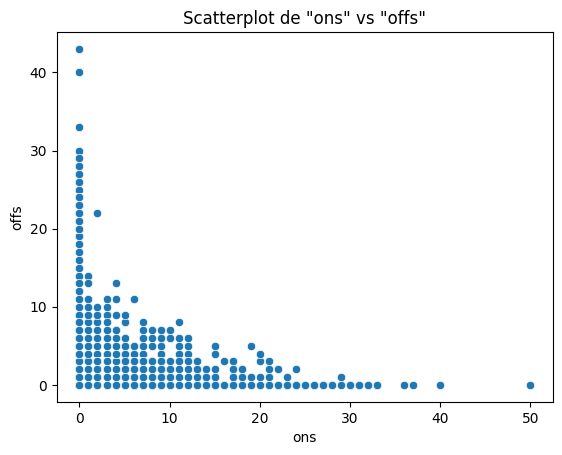

In [12]:
# Scatterplot entre 'ons' y 'offs'
sns.scatterplot(x=df['ons'], y=df['offs'])
plt.title('Scatterplot de "ons" vs "offs"')
plt.show()

In [13]:
# Reemplazar outliers con la media
df['ons'] = df['ons'].apply(lambda x: df['ons'].mean() if x < lower_bound or x > upper_bound else x)

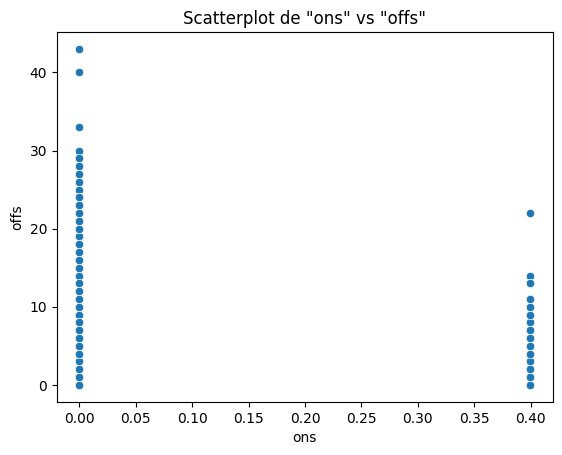

In [14]:
# Scatterplot entre 'ons' y 'offs'
sns.scatterplot(x=df['ons'], y=df['offs'])
plt.title('Scatterplot de "ons" vs "offs"')
plt.show()

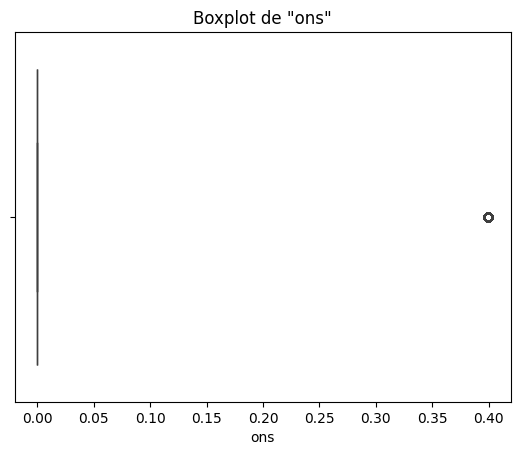

In [15]:
# Boxplot de la variable 'ons'
sns.boxplot(x=df['ons'])
plt.title('Boxplot de "ons"')
plt.show()

## 5.Resumen de Hallazgos
* Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.